#### JWST data released on the 14-09-2022

In [107]:
import os
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [108]:
print('cwd', os.getcwd())

## data
jwst = fits.open('./data/jw02738-o008_s00089_niriss_f200w-gr150c_cal.fits')

jwst.info()

cwd c:\Users\topol\JWST
Filename: ./data/jw02738-o008_s00089_niriss_f200w-gr150c_cal.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     352   ()      
  1  SCI           1 ImageHDU       129   (186, 80)   float32   
  2  DQ            1 ImageHDU        11   (186, 80)   int32 (rescales to uint32)   
  3  ERR           1 ImageHDU        10   (186, 80)   float32   
  4  WAVELENGTH    1 ImageHDU         9   (186, 80)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (186, 80)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (186, 80)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (186, 80)   float32   
  8  SCI           2 ImageHDU       103   (186, 84)   float32   
  9  DQ            2 ImageHDU        11   (186, 84)   int32 (rescales to uint32)   
 10  ERR           2 ImageHDU        10   (186, 84)   float32   
 11  WAVELENGTH    2 ImageHDU         9   (186, 84)   float32   
 12  VAR_POISSON    2 ImageHDU         9   

#### The above data consists of all the observed stars from the JWST

In [109]:
## define header data units
jwst_hdu0 = jwst[0].data
jwst_hdu1 = jwst[1].data
jwst_hdu2 = jwst[2].data
jwst_hdu3 = jwst[3].data
jwst_hdu4 = jwst[4].data
jwst_hdu5 = jwst[5].data
jwst_hdu6 = jwst[6].data
jwst_hdu7 = jwst[7].data

print(jwst_hdu2)

[[2181038081 2181038081 2181038081 ... 2181038081 2181038081 2181038081]
 [2181038081 2181038081 2181038081 ... 2181038081 2181038081 2181038081]
 [2181038081 2181038081 2181038081 ... 2181038081 2181038081 2181038081]
 ...
 [         1          1          1 ...          1          1          1]
 [         1          1          1 ...          1          1          1]
 [         1          1          1 ...          1          1          1]]


In [110]:
np.isnan(jwst_hdu2).sum()

0

#### Lets start wiht `jwst_hdu2`

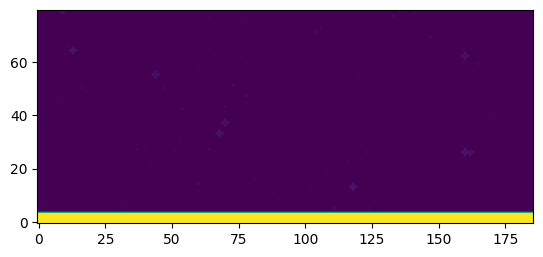

In [111]:
## plot1
plt.figure()

plt.imshow(jwst_hdu2, origin= 'lower')

plt.show()

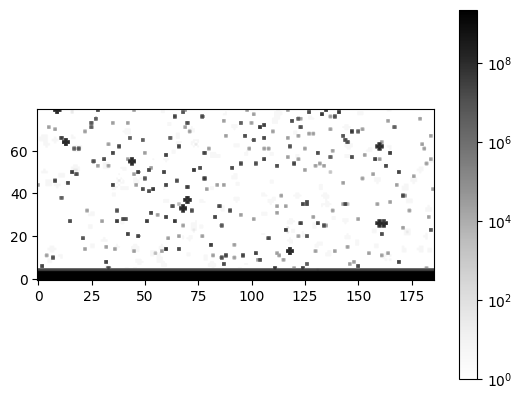

In [112]:
## change color
## plot
plt.figure()

plt.imshow(jwst_hdu2, origin= 'lower', norm= LogNorm(), cmap= 'Greys')
plt.colorbar()

plt.show()

In [113]:
## plot2 for header-data-unit hdu3
"""
plt.figure()

plt.imshow(jwst_hdu3, origin= 'lower')

plt.show()
"""

"\nplt.figure()\n\nplt.imshow(jwst_hdu3, origin= 'lower')\n\nplt.show()\n"

In [114]:
## change color
## plot
"""
plt.figure()

plt.imshow(jwst_hdu3, origin= 'lower', norm= LogNorm(), cmap= 'Greys')
plt.colorbar()

plt.show()
"""

"\nplt.figure()\n\nplt.imshow(jwst_hdu3, origin= 'lower', norm= LogNorm(), cmap= 'Greys')\nplt.colorbar()\n\nplt.show()\n"

In [115]:
## plot3 for hdu4
"""
plt.figure()

plt.imshow(jwst_hdu7, origin= 'lower')

plt.show()
"""

"\nplt.figure()\n\nplt.imshow(jwst_hdu7, origin= 'lower')\n\nplt.show()\n"

In [116]:
## change color
## plot
""" 
plt.figure()

plt.imshow(jwst_hdu4, origin= 'lower', norm= LogNorm(), cmap= 'Greys')
plt.colorbar()

plt.show() 

"""

" \nplt.figure()\n\nplt.imshow(jwst_hdu4, origin= 'lower', norm= LogNorm(), cmap= 'Greys')\nplt.colorbar()\n\nplt.show() \n\n"

In [117]:
## stats, mean, median
from astropy.stats import sigma_clipped_stats

mean, median, std = sigma_clipped_stats(jwst_hdu2, sigma= 3.0)

print(mean, median, std)

0.5882352941176471 0.0 1.4459986932575037


#### We can use DAOStarFinder from  photutils to detect stars from the image

In [118]:
from photutils.detection import DAOStarFinder

daofind = DAOStarFinder(fwhm= 3.0, threshold= 5.0 * std)     # fwhm - Full Width at Half Maximum

sources = daofind(jwst_hdu2 - median)

for column in sources.colnames:
    if column not in ('id', 'npix'):
        sources[column].info.format = '%.2f'

sources.pprint(max_width= 76)  

 id xcentroid ycentroid sharpness ... sky      peak         flux     mag  
--- --------- --------- --------- ... ---- ------------ ----------- ------
  1    118.00     13.00      0.27 ... 0.00 109314049.00 25357546.29 -18.51
  2    160.25     25.94      0.25 ... 0.00 100925441.00 21113127.18 -18.31
  3     68.00     33.00      0.24 ... 0.00 100663297.00 24679380.66 -18.48
  4    125.79     35.11      0.90 ... 0.00  16777217.00  1839855.39 -15.66
  5     12.99     64.01      0.27 ... 0.00 109314049.00 25357546.09 -18.51
  6     16.00     78.55      0.89 ... 0.00        33.00        3.56  -1.38
  7      9.00     78.71      0.35 ... 0.00 100925441.00 20502931.32 -18.28


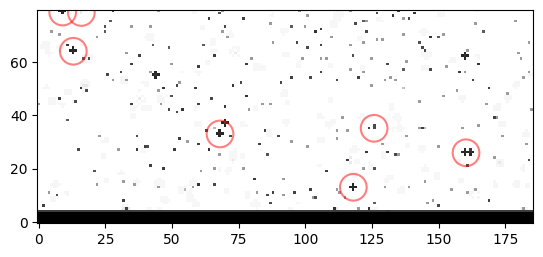

In [119]:
## circle all the stars
from photutils.aperture import CircularAperture

pos = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(pos, r= 5.0)
plt.imshow(jwst_hdu2, cmap= 'Greys', origin= 'lower', norm= LogNorm(), interpolation= 'nearest')

apertures.plot(color= 'red', lw= 1.5, alpha= 0.5)
plt.show();                        

#### seven stars found!!

#### Aparture photometry is the tool used to quantify brightness of stars by analysing their flux

#### Flux of stars

####

In [120]:
### 
print(apertures)

Aperture: CircularAperture
positions: [[118.        ,  13.        ],
            [160.25375355,  25.93993393],
            [ 67.99999884,  33.00000116],
            [125.78673862,  35.11271793],
            [ 12.98809209,  64.01190791],
            [ 16.        ,  78.54980189],
            [  9.        ,  78.70939211]]
r: 5.0


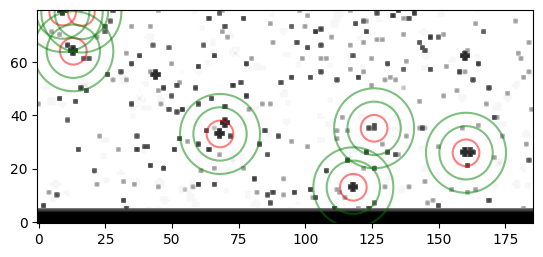

In [121]:
from photutils.aperture import CircularAnnulus, ApertureStats, aperture_photometry

annulus_aperture = CircularAnnulus(pos, r_in= 10, r_out= 15)

plt.figure()
plt.imshow(jwst_hdu2, cmap= 'Greys', norm= LogNorm(), origin= 'lower')
apertures.plot(color= 'red', lw= 1.5, alpha= 0.5);
annulus_aperture.plot(color= 'green', lw= 1.5, alpha= 0.5);

plt.show()

In [122]:
## define the background
aperstats = ApertureStats(jwst_hdu2, annulus_aperture)
bkg_mean = aperstats.mean
aperture_area = apertures.area_overlap(jwst_hdu2)
total_bkg = bkg_mean * aperture_area

star_data = aperture_photometry(jwst_hdu2, apertures)

star_data['total_bkgnd'] = total_bkg

for column in star_data.colnames:
    star_data[column].info.format = '%.8g'

star_data.pprint()    

 id  xcenter   ycenter   aperture_sum  total_bkgnd 
       pix       pix                               
--- --------- --------- ------------- -------------
  1       118        13 6.4620404e+08 3.4316914e+10
  2 160.25375 25.939934 1.0322485e+09     39464.455
  3 67.999999 33.000001 1.0359871e+09      16889842
  4 125.78674 35.112718      58738697     8447097.1
  5 12.988092 64.011908 6.9033154e+08      37344512
  6        16 78.549802     112.71438 1.0779933e+08
  7         9 78.709392 5.0357867e+08      53315059


#### lets find the magnitude using the formula: 
#### Formula for mag:


In [123]:
##
from acstools import acszpt

# Date and HST-specific values
date = '2022-09-14'
instrument = 'WFC'  # For HST, you could use detectors like 'WFC' or 'HRC'
filter = 'F814W'  # HST-specific filter

# Fetch the zero-point table for the date and instrument
q = acszpt.Query(date=date, detector=instrument)
zpt_table = q.fetch()

# Fetch the zero-point for a specific filter
q_filter = acszpt.Query(date=date, detector=instrument, filt=filter)
filter_zpt = q_filter.fetch()

print(filter_zpt)

Filter PHOTLAM             PHOTFLAM            STmag  VEGAmag  ABmag 
       Angstrom erg / (Angstrom electron cm2) mag(ST)   mag   mag(AB)
------ -------- ----------------------------- ------- ------- -------
 F814W   8045.5                    7.1184e-20  26.769  25.502  25.933


In [124]:
zeropoint = 25.933
exposure = 708.63


magnitudes = []
for line in star_data:
    magnitudes.append(zeropoint - (2.5 * np.log10(abs(line[3] - line[4]) / exposure)))

star_data['magnitude'] = magnitudes

star_data.pprint()

 id  xcenter   ycenter   aperture_sum  total_bkgnd      magnitude     
       pix       pix                                                  
--- --------- --------- ------------- ------------- ------------------
  1       118        13 6.4620404e+08 3.4316914e+10  6.740918165530683
  2 160.25375 25.939934 1.0322485e+09     39464.455 10.524629670980898
  3 67.999999 33.000001 1.0359871e+09      16889842  10.53850976305833
  4 125.78674 35.112718      58738697     8447097.1 13.805310197293295
  5 12.988092 64.011908 6.9033154e+08      37344512 11.021787453056021
  6        16 78.549802     112.71438 1.0779933e+08 12.977509852439667
  7         9 78.709392 5.0357867e+08      53315059 11.425381708037238
